<table style="border: none" align="left">
   <tr style="border: none">
      <th style="border: none"><font face="verdana" size="5" color="black"><b>Use Core ML model to predict Boston house prices</b></th>
      <th style="border: none"><img src="https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true" alt="Watson Machine Learning icon" height="40" width="40"></th>
   </tr>
   <tr style="border: none">
       <th style="border: none"><img src="https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/boston/images/boston_houseprice_banner.png" width="600" alt="Icon"> </th>
   </tr>
</table>

This notebook demonstrates how to perform regression analysis using `scikit-learn 0.20` and the `watson-machine-learning-client-V4` package. You will learn how to create a virtual deployment using Watson Machine Learning - the version compatible with this `scikit-learn 0.20` only.

Some familiarity with Python is helpful. This notebook is compatible CP4D 3.0 and Python 3.6.

You will use the sample data set, **sklearn.datasets.load_boston** which is available in scikit-learn, to predict house prices.

## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``
-  Explore data
-  Prepare data for training and evaluation
-  Create a `scikit-learn` pipeline
-  Train and evaluate a model
-  Store a model in your project or deployment space
-  Deploy a model as Core ML (virtual deployment) in the deployment space


## Contents

1.	[Load and explore data](#load)
2.	[Build a scikit-learn linear regression model](#model)
3.	[Set up the environment](#setup)
4.	[Save the model](#save)
5.	[Create a virtual deployment (with deployment space only)](#deploy)
6.	[Summary and next steps](#summary)

To get started on CP4D 3.0, find documentation on installation and set up <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/cpd/overview/welcome.html" target="_blank" rel="noopener no referrer">here</a>.

<a id="load"></a>
## 1. Load and explore data

The sample data set contains Boston house prices. The data set can be found <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/housing/" target="_blank" rel="noopener no referrer">here</a>.

In this section, you will learn how to:
- [1.1 Explore Data](#dataset)  
- [1.2 Check the correlations between predictors and the target](#corr)

### 1.1 Explore data<a id="dataset"></a>

In this subsection, you will perform exploratory data analysis of the Boston house prices data set.

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

In [2]:
import sklearn
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()

Let's check the names of the predictors.

In [3]:
print(boston_data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Tip:** Run `print(boston_data.DESCR)` to view a detailed description of the data set.

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Create a pandas DataFrame and display some descriptive statistics.

In [5]:
boston_pd = pd.DataFrame(boston_data.data)
boston_pd.columns = boston_data.feature_names
boston_pd['PRICE'] = boston_data.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The describe method generates summary statistics of numerical predictors.

In [6]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1.2 Check the correlations between predictors and the target <a id="corr"></a>

In this subsection, you will check the linear correlations between predictors and target by plotting a scatterplot matrix and a heatmap. You need the following packages in order to plot the scatterplot matrix and the heatmap:
* ``matplotlib``
* ``seaborn``

Pearson-type correlations - linear correlations - are excessively affected by outliers, unequal predictors, non-normality, and non-linearities. Hence, when plotting the correlation matrix, it's better to plot the scatterplot matrix first to check the outliers and then plot the heatmap of the correlation matrix.

First, let's plot the scatterplot matrix.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(style='ticks')

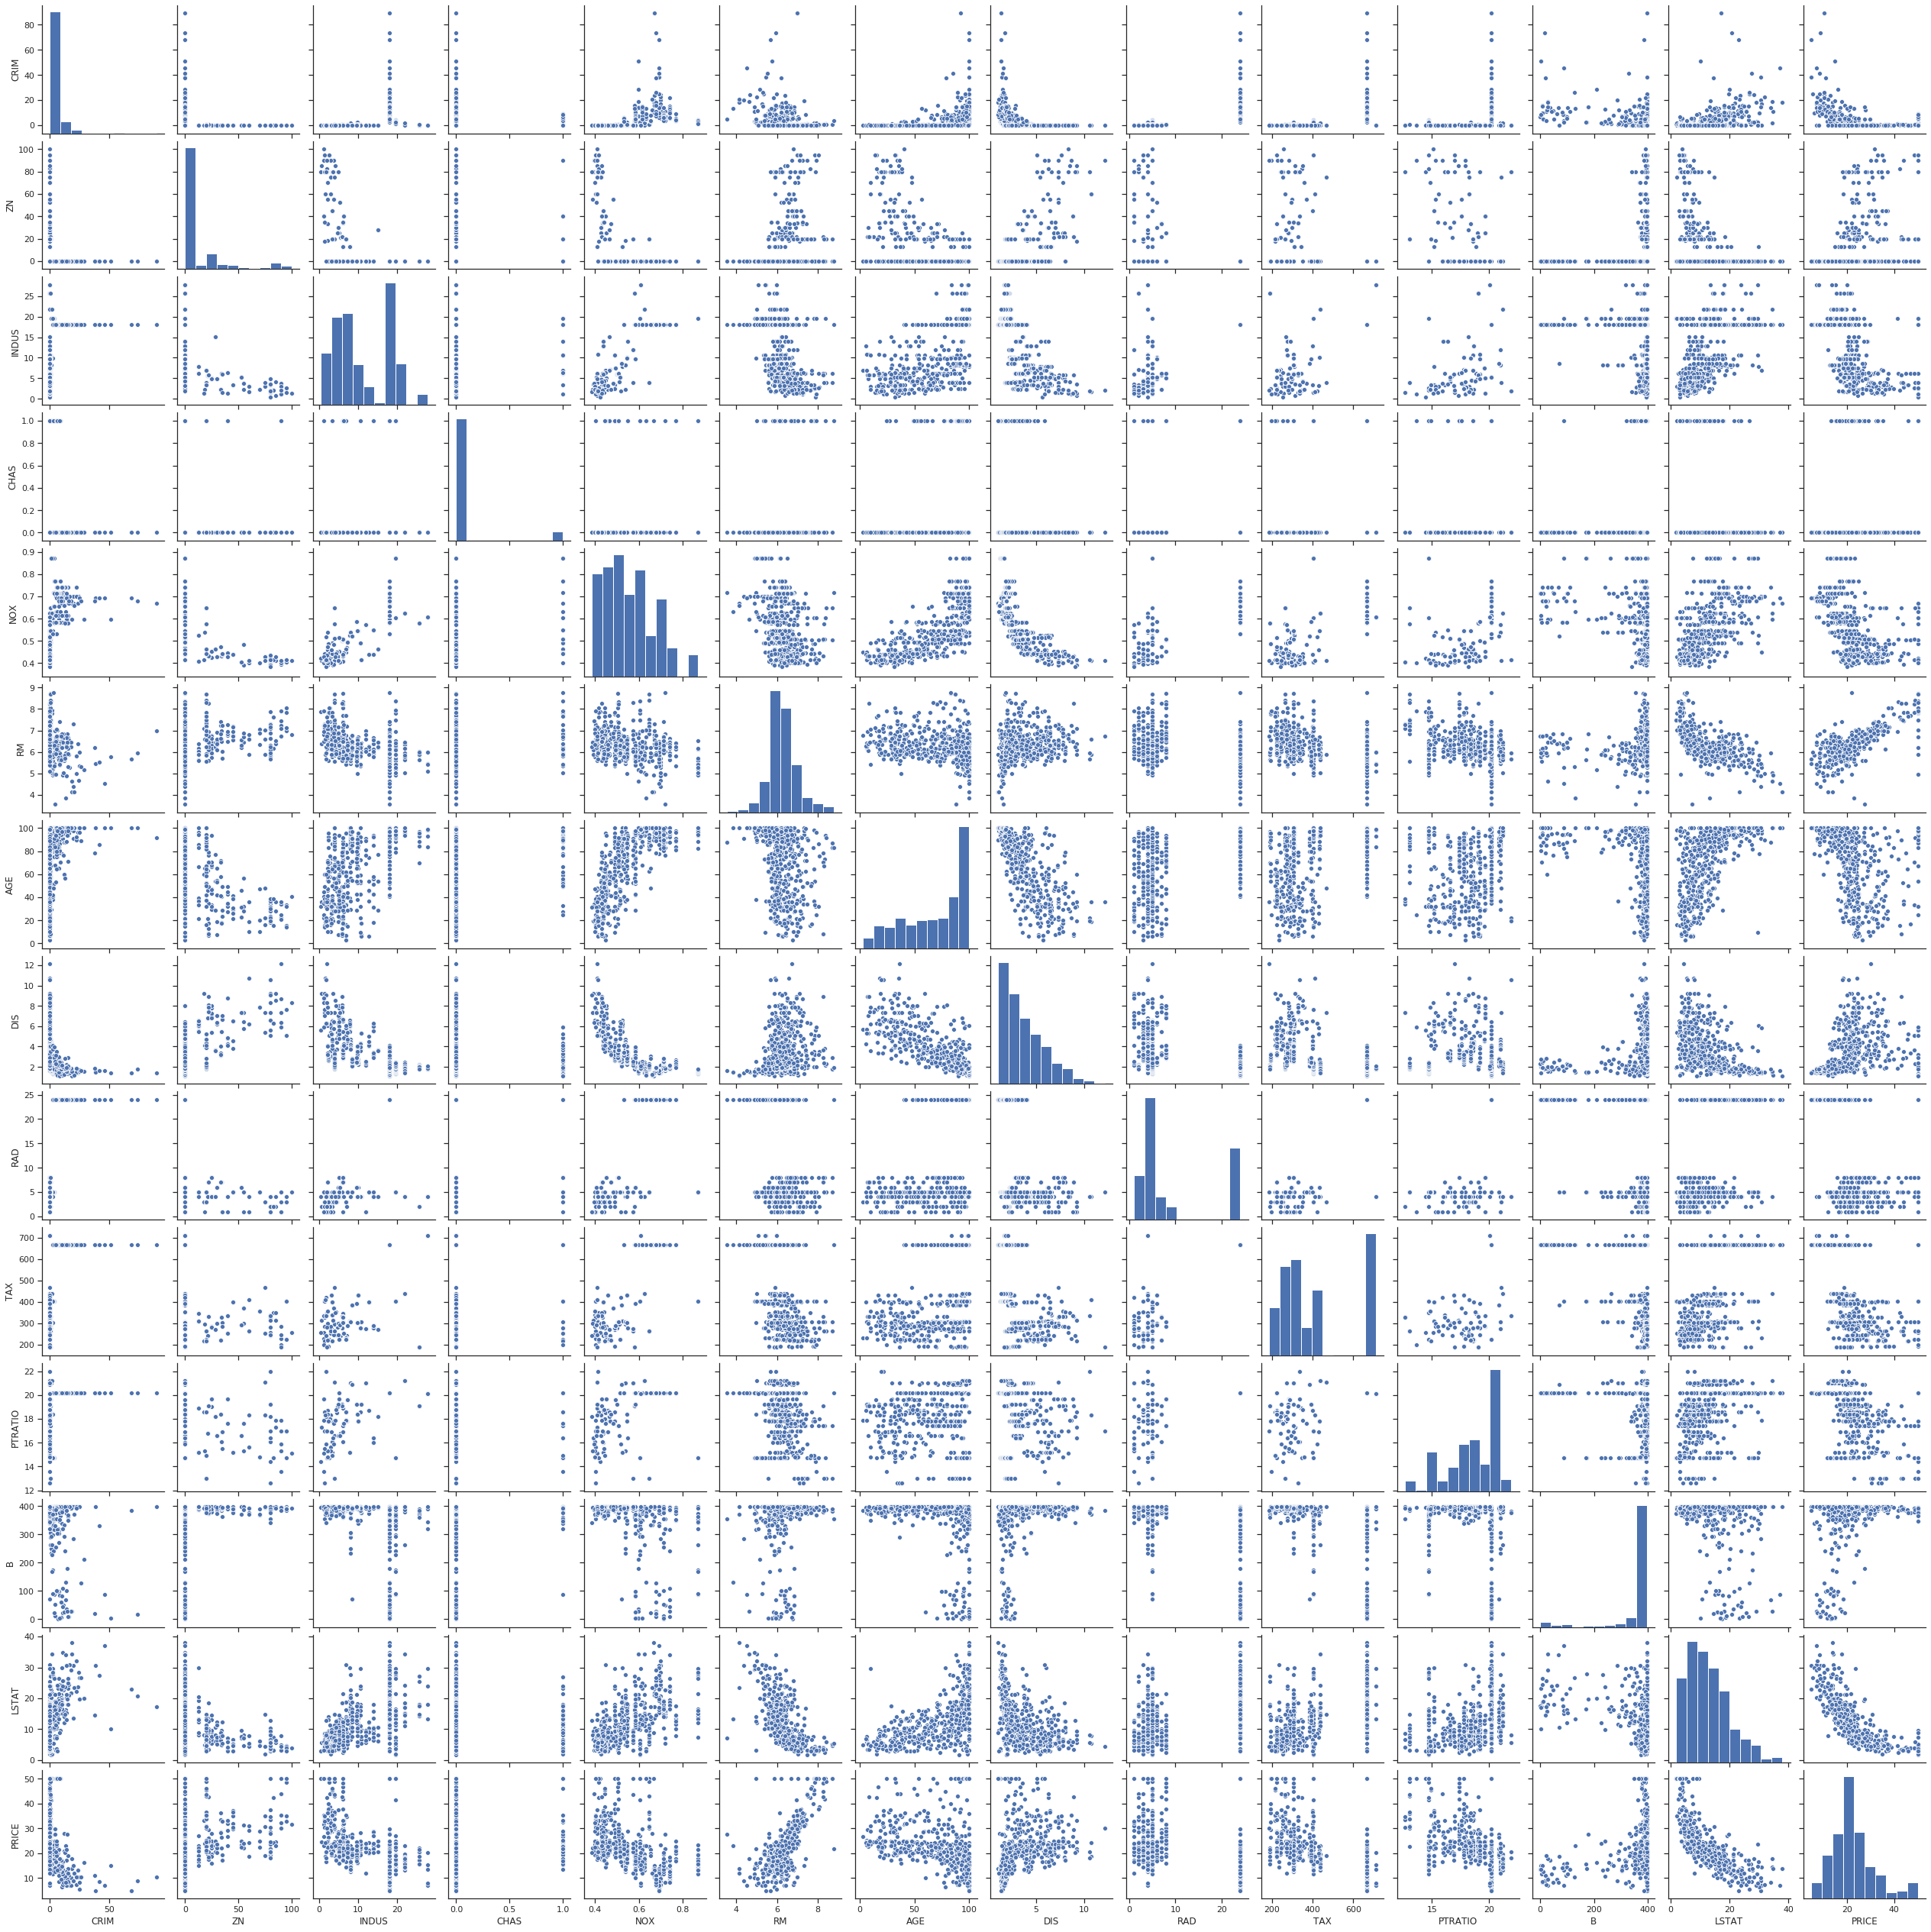

In [9]:
sns.pairplot(boston_pd)

Second, the heatmap of correlation matrix.

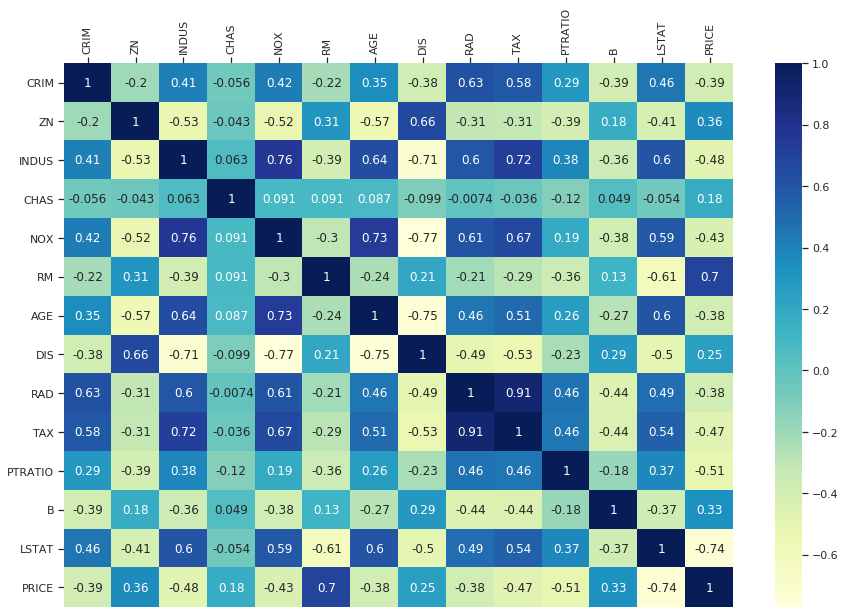

In [10]:
plt.subplots(figsize=(15,10))
hm = sns.heatmap(boston_pd.corr(), annot=True, cmap='YlGnBu')
hm.set_xticklabels(hm.get_xticklabels(), rotation=90)
hm.xaxis.set_ticks_position('top')

From both plots, you can see that the predictor ``RM`` has strong correlation with the target ``PRICE``.

<a id="model"></a>
## 2. Build a scikit-learn linear regression model

In this section, you will learn how to:
- [2.1 Split data](#prep)
- [2.2 Create a scikit-learn pipeline](#pipe)
- [2.3 Train the model](#train)

### 2.1 Split data<a id="prep"></a>

In this subsection, you will split the data set into: 
- Train data set
- Test data set

In [11]:
# Split the data into two data sets.
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis = 1)
y = boston_pd['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of training records: ' + str(X_test.shape[0]))

Number of training records: 339
Number of training records: 167


Your data has been successfully split into two data sets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set will be used for model evaluation and is used to test the model.

### 2.2 Create a scikit-learn pipeline<a id="pipe"></a>

In this subsection, you will create a scikit-learn pipeline.

First, import the scikit-learn machine learning packages that are needed in the subsequent steps.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Standardize the features by removing the mean and by scaling to unit variance.

In [13]:
scaler = StandardScaler()

Next, define the regressor you want to use. This notebook uses the Linear Regression model.

In [14]:
lr = LinearRegression()

Build the pipeline. A pipeline consists of a transformer (Standard Scaler) and an estimator (Linear Regression model).

In [15]:
pipeline = Pipeline([('scaler', scaler), ('lr', lr)])

### 2.3 Train the model<a id="train"></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [16]:
model = pipeline.fit(X_train, y_train)

Check the model quality.

In [17]:
y_pred = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print('MSE: ' + str(mse))

MSE: 28.53045876597462


Plot the scatter plot of prices vs. predicted prices.

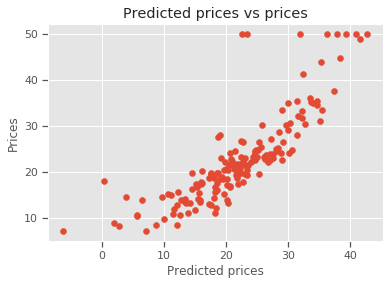

In [18]:
plt.style.use('ggplot')
plt.title('Predicted prices vs prices')
plt.ylabel('Prices')
plt.xlabel('Predicted prices')
plot = plt.scatter(y_pred, y_test)

**Note:** You can tune your model to achieve better accuracy. To keep this example simple, the tuning section is omitted.

<a id="setup"></a>
## 3. Set up the environment

Import the `watson-machine-learning-client` module.
<div class="alert alert-block alert-info">
For more information about the <b>Watson Machine Learning Python client (V4)</b>, please refer to the <a href="https://wml-api-pyclient-dev-v4.mybluemix.net/" target="_blank" rel="noopener no referrer">Python client documentation</a>. If you're using the notebook within a project on your CP4D cluster, you do not need to install this package as it comes pre-installed with the notebooks. The installation code below is for demonstration but is non-executable at this stage.
</div>

In [19]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

**Authenticate the Python client on CP4D.**

<div class="alert alert-block alert-info">To find your authentication information (your credentials) follow the steps provided here in the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-authentication-local.html" target="_blank" rel="noopener no referrer">Documentation.</a></div>

In [20]:
# Enter your credentials here.

from project_lib.utils import environment
url = environment.get_common_api_url()

import sys,os,os.path
token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
     "instance_id": "openshift",
     "token": token,
     "url": url,
     "version": "3.0.0"
}

In [21]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [22]:
client.version

'1.0.64'

<div class="alert alert-block alert-info">
You have a choice to either save the model in the <b>project</b> or the <b>deployment space</b>:<br><br>
    <li> If you're saving the model in your project, you have to set the default project using the python client.</li><br>
    <li>If you're saving the model in the deployment space, you have to obtain the space UID of the deployment space you've created. Then you'd use this to set the default space using the python client. From there you'll be able to deploy and score the model in your deployment space.</li></div>

### To set the default project, use the following code.

In [23]:
from project_lib import Project
project = Project.access()
project_id = project.get_metadata()["metadata"]["guid"]

client.set.default_project(project_id)

'SUCCESS'

### To set the default space, follow these steps.

<div class="alert alert-block alert-info">
You can create your own <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/analyze-data/ml-spaces_local.html" target="_blank" rel="noopener no referrer">deployment space</a> by selecting <b>Analytics deployments</b> under <b>Analyze</b> from the Navigation Menu on the top left of this page.</div>

Alternatively, you can create a deployment and obtain its UID using the code in the following cell. The cell is not executable cell at this stage, but you can enter the name of your space in the metadata and use it if needed.

In [29]:
# Obtain the UId of your space
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

**Action:** Enter the name of your deployment space in the code below: `space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')`.

In [30]:
# Enter the name of your deployment space here:
space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')
print("Space UID = " + space_uid)

Space UID = fd3cfb63-6277-4c4f-8143-e05e06aba349


You can set the default space using the cell below.

In [31]:
client.set.default_space(space_uid)

Unsetting the project_id ...


'SUCCESS'

## 4. Save the model<a id="save"></a>

First, you need to create the model metadata. Since you're creating a virtual deployment, you'll choose the compatible version, `scikit-learn 0.20`, as the Software Specification and Type.

In [32]:
# Model metadata
software_spec_uid = client.software_specifications.get_uid_by_name('scikit-learn_0.20-py3.6')
model_metadata = {
    client.repository.ModelMetaNames.NAME: 'Boston house price prediction',
    client.repository.ModelMetaNames.DESCRIPTION: 'My Core ML Model',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.20'
}

<div class="alert alert-block alert-info">To list the supported software specifications, run <tt>client.software_specifications.list()</tt>.<br>To find more information about the frameworks with their respective <b>Types</b> and <b>Software Specifications</b>, visit the <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/wsj/wmls/wmls-deploy-python-types.html" target="_blank" rel="noopener no referrer">documentation</a>.</div>

Store the model and can extract the model UID from the saved model details.

In [33]:
published_model = client.repository.store_model(model=model, meta_props=model_metadata, training_data=X_train, training_target=y_train)

In [34]:
model_uid = client.repository.get_model_uid(published_model)
print("Model UID = " + model_uid)

Model UID = 6f8a9f1c-5ded-4a6d-99c3-f5640d2dff3f


Get the saved model metadata from WML using the model UID.

In [35]:
# Details about the model.
model_details = client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'content_status': {'state': 'persisted'},
            'description': 'My CoreML Model',
            'label_column': 'PRICE',
            'name': 'Boston house price prediction',
            'software_spec': {'id': '09c5a1d0-9c1e-4473-a344-eb7b665ff687'},
            'space': {'href': '/v4/spaces/fd3cfb63-6277-4c4f-8143-e05e06aba349',
                      'id': 'fd3cfb63-6277-4c4f-8143-e05e06aba349'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'location': {'bucket': 'not_applicable'},
                                          'schema': {'fields': [{'name': 'CRIM',
                                                                 'type': 'float64'},
                                                     

You can list all stored models using the `list_models` method.

In [36]:
client.repository.list_models()

------------------------------------  -----------------------------  ------------------------  -----------------
GUID                                  NAME                           CREATED                   TYPE
6f8a9f1c-5ded-4a6d-99c3-f5640d2dff3f  Boston house price prediction  2020-04-09T02:24:16.002Z  scikit-learn_0.20
------------------------------------  -----------------------------  ------------------------  -----------------


<div class="alert alert-block alert-info">
From the list of stored models, you can see that model is successfully saved.<br><br>
If you've set the default project, this means you've saved the model in your project. You can see the saved model in your project UI by clicking on your project name in the breadcrumb at the top of the application.<br><br>
If you've set the default space, this means that you've saved the model in your deployment space. You can view your model by selecting <b>Analytics Deployments</b> under <b>Analyze</b> from the Navigation Menu and clicking on your deployment space name.</div>

If you're using a deployment space, proceed to Section 5: [Create a virtual deployment (with deployment space only)](#deploy). If not, you may skip to the [summary](#summary).

<a id="deploy"></a>
## 5. Create a virtual deployment (with deployment space only)

In this section, you will learn how to use the WML client to create a **virtual** deployment via the `Core ML`. You will also learn how to download a Core ML model for your <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> project.

- [5.1 Create a virtual deployment for the model](#create)
- [5.2 Download the Core ML file from the deployment](#getdeploy)
- [5.3 Test the Core ML model](#testcoreML)

### 5.1 Create a virtual deployment for the model<a id="create"></a>

You'll create deployment metadata and use the model UID obtained in the previous section.

In [37]:
# Deployment metadata.
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME: "Virtual deployment of Boston model",
    client.deployments.ConfigurationMetaNames.DESCRIPTION: "My Virtual Deployment",
    client.deployments.ConfigurationMetaNames.VIRTUAL: {
        "export_format": "coreml"
    }
}

Deploy the model to the deployment space.

In [38]:
deployment_details = client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '6f8a9f1c-5ded-4a6d-99c3-f5640d2dff3f' started

#######################################################################################


initializing........
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2accd327-6f70-4c10-84e4-46e2691fc6d9'
------------------------------------------------------------------------------------------------




In [39]:
client.deployments.list()

------------------------------------  ----------------------------------  -----  ------------------------  -------------
GUID                                  NAME                                STATE  CREATED                   ARTIFACT_TYPE
2accd327-6f70-4c10-84e4-46e2691fc6d9  Virtual deployment of Boston model  ready  2020-04-09T02:24:33.736Z  model
------------------------------------  ----------------------------------  -----  ------------------------  -------------


<div class="alert alert-block alert-info">
From the list of deployed models, you can see that model was successfully deployed in the deployment space.</div>

Now, you can check details of your deployments.

In [40]:
# Deployment UID.
deployment_uid = client.deployments.get_uid(deployment_details)
print('Deployment UID = {}'.format(deployment_uid))

Deployment UID = 2accd327-6f70-4c10-84e4-46e2691fc6d9


You can check the deployment details by running the following cell.

In [41]:
# Deployment details.
client.deployments.get_details(deployment_uid)

{'metadata': {'parent': {'href': ''},
  'name': 'Virtual deployment of Boston model',
  'guid': '2accd327-6f70-4c10-84e4-46e2691fc6d9',
  'description': 'My Virtual Deployment',
  'id': '2accd327-6f70-4c10-84e4-46e2691fc6d9',
  'modified_at': '2020-04-09T02:24:33.736Z',
  'created_at': '2020-04-09T02:24:33.736Z',
  'href': '/v4/deployments/2accd327-6f70-4c10-84e4-46e2691fc6d9',
  'space_id': 'fd3cfb63-6277-4c4f-8143-e05e06aba349'},
 'entity': {'name': 'Virtual deployment of Boston model',
  'custom': {},
  'description': 'My Virtual Deployment',
  'virtual': {'export_format': 'coreml'},
  'space': {'id': 'fd3cfb63-6277-4c4f-8143-e05e06aba349',
   'href': '/v4/spaces/fd3cfb63-6277-4c4f-8143-e05e06aba349'},
  'status': {'state': 'ready',
   'virtual_deployment_downloads': [{'url': 'https://internal-nginx-svc:12443/v4/models/6f8a9f1c-5ded-4a6d-99c3-f5640d2dff3f/content?space_id=fd3cfb63-6277-4c4f-8143-e05e06aba349&format=coreML'}]},
  'asset': {'id': '6f8a9f1c-5ded-4a6d-99c3-f5640d2dff3f'

### 5.2 Download the `Core ML` file from the deployment<a id="getdeploy"></a>

Download the virtual deployment content: Core ML model.

In [42]:
deployment_content = client.deployments.download(deployment_uid)



----------------------------------------------------------
Successfully downloaded deployment file: mlartifact.tar.gz
----------------------------------------------------------




Use the code in the cell below to create the download link.

In [43]:
from watson_machine_learning_client.utils import create_download_link

create_download_link(deployment_content)

**Note:** You can use <a href="https://developer.apple.com/xcode/" target="_blank" rel="noopener no referrer">Xcode</a> to preview the model's metadata (after unzipping). 

### 5.3 Test the `Core ML` model<a id="testcoreML"></a>

Use the following steps to run a test against the downloaded Core ML model.

In [ ]:
!pip install --upgrade coremltools

Use the ``coremltools`` to load the model and check some basic metadata.

First, extract the model.

In [45]:
from watson_machine_learning_client.utils import extract_mlmodel_from_archive

extracted_model_path = extract_mlmodel_from_archive('mlartifact.tar.gz', model_uid)

Load the model and check the description.

In [46]:
import coremltools

loaded_model = coremltools.models.MLModel(extracted_model_path)
print(loaded_model.short_description)

'description'


The model looks good and can be used on your iPhone now.

<a id="summary"></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use scikit-learn to create a Core ML model.

If you are interested in sample swift application (for iOS), please visit <a href="https://github.com/pmservice/go-digits" target="_blank" rel="noopener no referrer">here</a>. 


### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success">

<h4>IBM documentation</h4>
<br>
 <li> <a href="https://wml-api-pyclient-dev-v4.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSQNUZ_3.0.0/cpd/overview/welcome.html" target="_blank" rel="noopener noreferrer">CP4D 3.0</a></li>
 
<h4> IBM Samples</h4>
<br>
 <li> <a href="https://github.com/IBMDataScience/sample-notebooks" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
 <li> <a href="https://github.com/pmservice/wml-sample-models" target="_blank" rel="noopener noreferrer">Sample models</a></li>
 
<h4> Others</h4>
<br>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a><br></li>
 </div>

### Author

**Lukasz Cmielowski**, Ph.D., is a Lead Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Jihyoung Kim**, Ph.D., is a Data Scientist at IBM who strives to make data science easy for everyone through Watson Studio.

<hr>
Copyright © 2017-2020 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style="background:#F5F7FA; height:110px; padding: 2em; font-size:14px;">
<span style="font-size:18px;color:#152935;">Love this notebook? </span>
<span style="font-size:15px;color:#152935;float:right;margin-right:40px;">Don't have an account yet?</span><br>
<span style="color:#5A6872;">Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style="border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;"><a href="https://ibm.co/wsnotebooks" target="_blank" style="color: #3d70b2;text-decoration: none;">Sign Up</a></span><br>
</div>